*Laboratorio* 01 TS3

Mateo Muñoz Arroyave
CC 1036676919

David Esteban Londoño Patiño
CC 1020465536


# Solución Laboratorio No. 01 Tratamiento de Señales 3 2023-2

## 1. Introducción

<p style="text-align: justify;">En este laboratorio se pretende hacer uso del eventanado como herramienta fundamental en el análisis de señales, se hará uso de disintos tipos de algoritmos para eventanado para analizar su impacto en la señal.</p>

<p style="text-align: justify;">Se considerará el caso de la generación de una señal, siendo una señal de audio y se examinará un segmento especifíco de la misma para realizar un análisis de sus propiedades.</p>

## 2. Objetivos

<p style="text-align: justify;">- Establecer las diferencias entre las señales estacionarias y no-estacionarias.</p>

<p style="text-align: justify;">- Aplicar el enventanado como herramienta de an ́alisis y procesamiento de se nales.</p>

## 3. Descarga de Archivos e importación de audios

<p style="text-align: justify;">Descargue las siguientes señales de audio, y establezca la frecuencia de muestreo y número de datos:</p>

In [ ]:
#Librerías

import numpy as np                                 # Librería para procedimientos matemáticos
import matplotlib.pyplot as plt                    # Librería para graficación
from scipy.io.wavfile import read                  # Librería para LEctura de archivos de audio
from IPython.display import Audio, display
from scipy import signal
from scipy.fft import fft, fftshift

In [ ]:
audio=('C4.wav')
fs, x=read(audio)
x=x/float(max(abs(x)))
t=np.arange(0, float(len(x))/fs, 1.0/fs)
print('Frecuecnia de muestreo = ',fs)
print('Numero de datos x = ',len(x))
print('Numero de datos t = ',len(t))

Frecuecnia de muestreo =  22050
Numero de datos x =  141364
Numero de datos t =  141364


<p style="text-align: justify;">Ya que la grabacion descargada venía grabada en dos canales diferentes (por ejemplo, al utilizar dos microfonos se genera este efecto o un sonido estéreo) se trabajará solo con un canal, en este caso el canal 1; Aunque usando los sentidos humanos no es posible distinguir entre uno u otro, en la próxima gráfica se visualizará un solo canal.</p>

## 4. Análisis de la señal

<p style="text-align: justify;">Visualice las senales de audio en dos gráficas, una que muestre la señal completa, y otra que muestre la señal en una ventana de 50 milisegundos, ¿qué propiedades presentan los datos observados? ¿podría decirse que estas señales son estacionarias?</p>

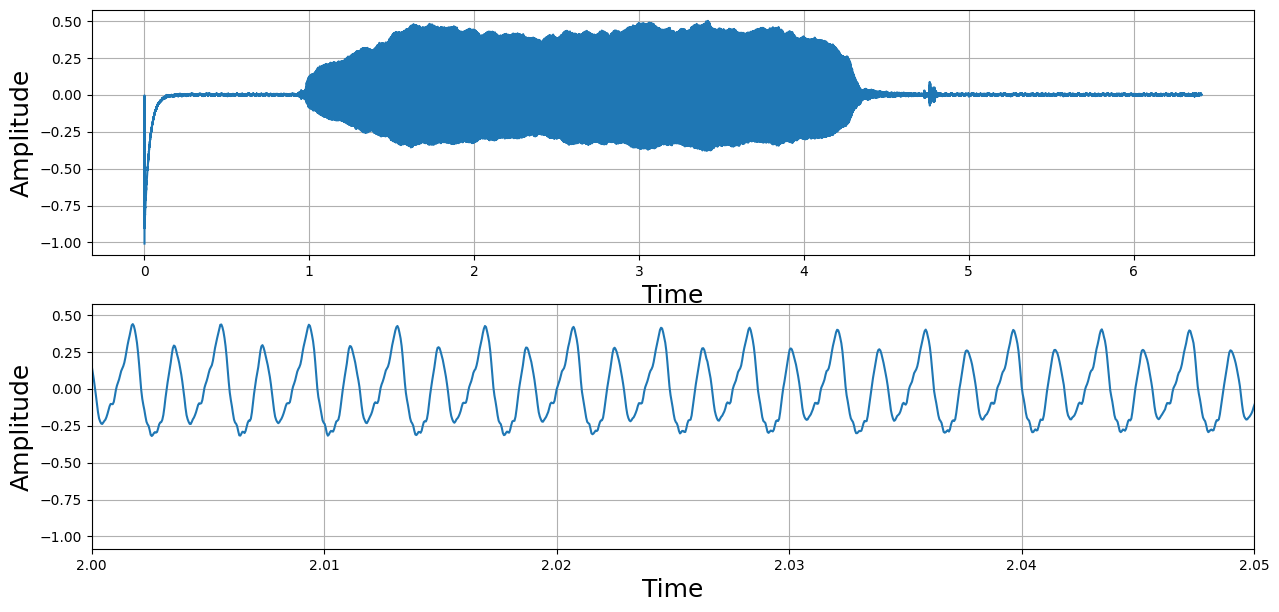

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
plt.plot(t,x)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)
plt.grid()

plt.subplot(2,1,2)
plt.plot(t,x)
plt.xlim(2,2.05)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)
plt.grid()
plt.show()


Audio(x, rate=fs) # para escuchar la senal, si se desea

<p style="text-align: justify;">Tras analizar ambas gráficas, se puede observar para la señal del audio completo como se presenta un componente de ruido, al inicio y al final de la señal, contando con la mayor cantidad de información relevante a partir del primer segundo hasta aproximadamente los 4.5 segundos.</p>

<p style="text-align: justify;">Para el ejercicio propuesta de tomar una pequeña muestra de 50 milisegundos de enventanado, se extrae una porción de la señal, a partir de los 2000 milisegundos, del ejercicio se obtiene la gráfica número 2 de la cuál, tras su análisis se pueden observar y concluir ciertas características.</p>

*   La señal resultante, tras un proceso de observación se puede observar que conservar su media, con una amplitud aproximada de 0.10 en el eje Y.
*   La señal luce como una señal periódica, con un periodo de aproximadamente 5 milisegundos.
*   Entre los picos de la señal se puede observar igualmente una tendencia a ser un valor fijo, soportando el literal anterior, donde se afirma que la señal tiene un comportamiento periódico.

Ese tipo de comportamiento determinista permite concluir que la pequeña porción de señal analizada es una señál de tipo estacionario, donde es posible realizar una estudio de sus características principales (Periodo, Frecuencia, Media, etc).

Es importante aclarar que esta afirmación es para las señal producto del proceso de enventanado.

Una vez se amplia el tamaño de la ventana y tomamos más muestras para su estudio, podemos notar que la amplitud comienza a presentar comportamientos más dinámicos, por lo que a medida que el tamaño de la ventana se hace mayor se puede evidenciar que estamos ante una señal no estacionaria.



## 5. Función de enventanado

<p style="text-align: justify;">Escriba una función que realice la segmentacíon (enventanado) de una señal de longitud N y frecuencia de muestreo fs, utilizando ventanas de longitud L y traslape P. La función debe permitir escoger entre cuatro tipos de ventanas, incluyendo las ventanas Rectangular, y Hann. Para cada ventana, muestre en una gráfica alguno de los segmentos obtenidos. ¿Qué puede concluir de estos resultados?:</p>

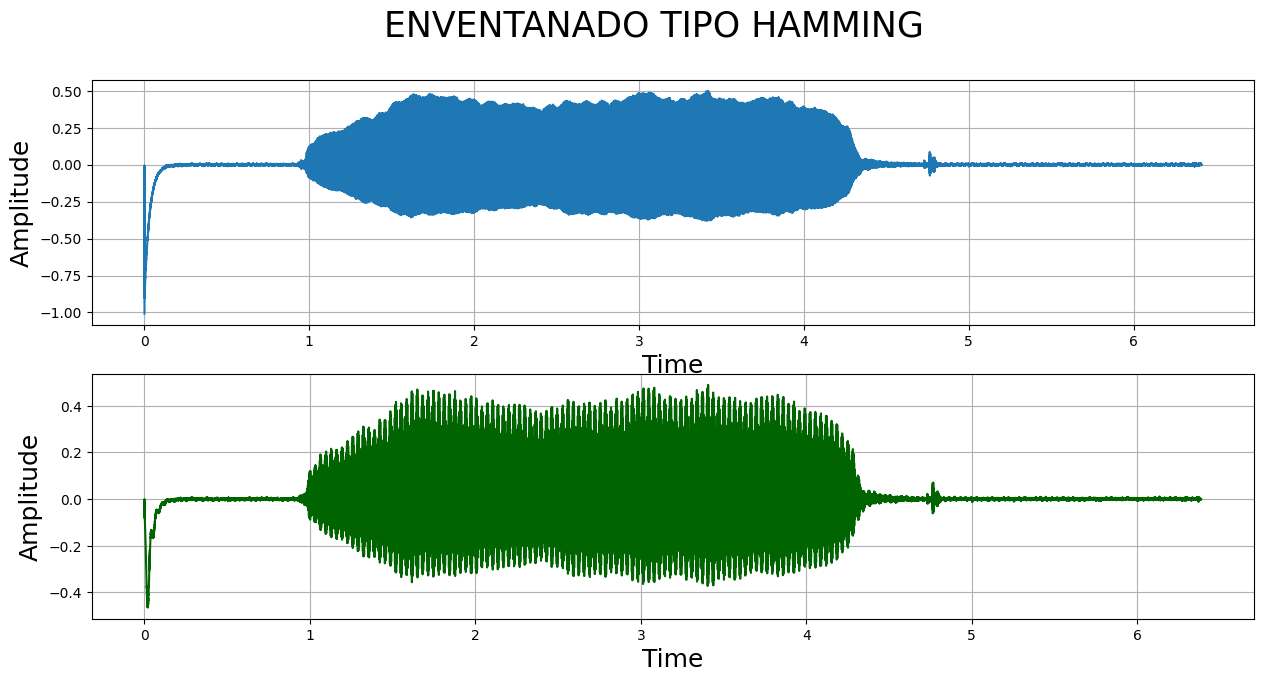

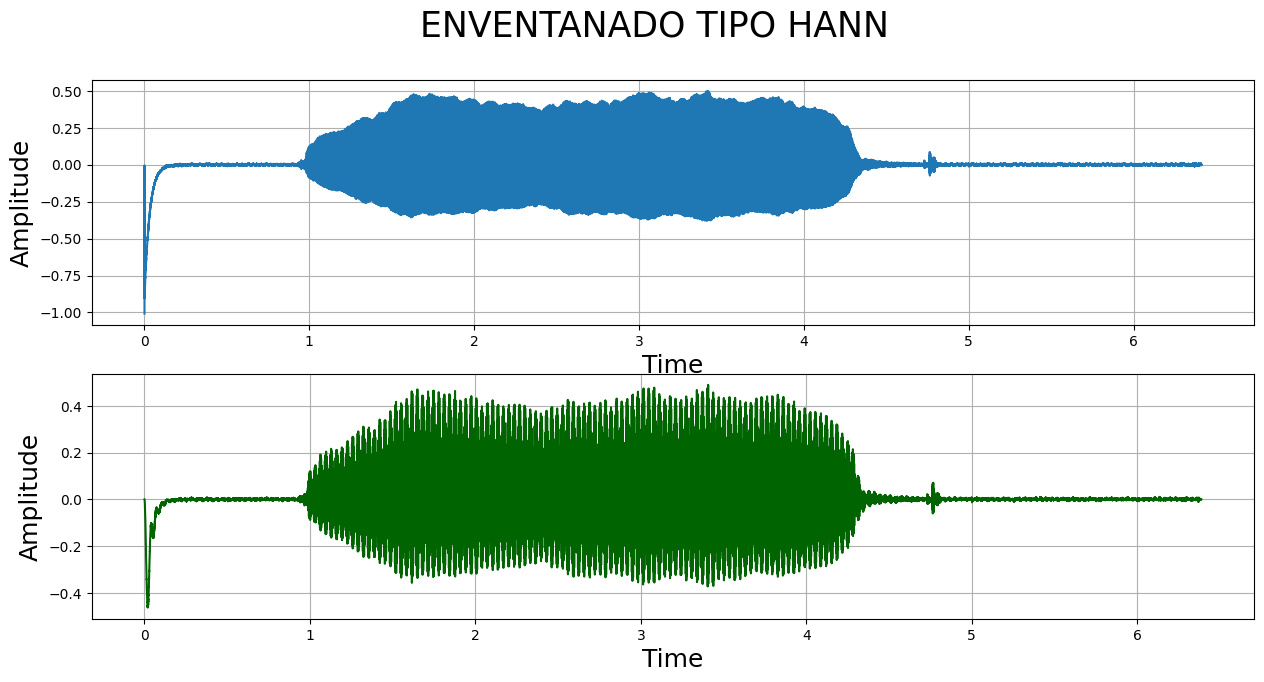

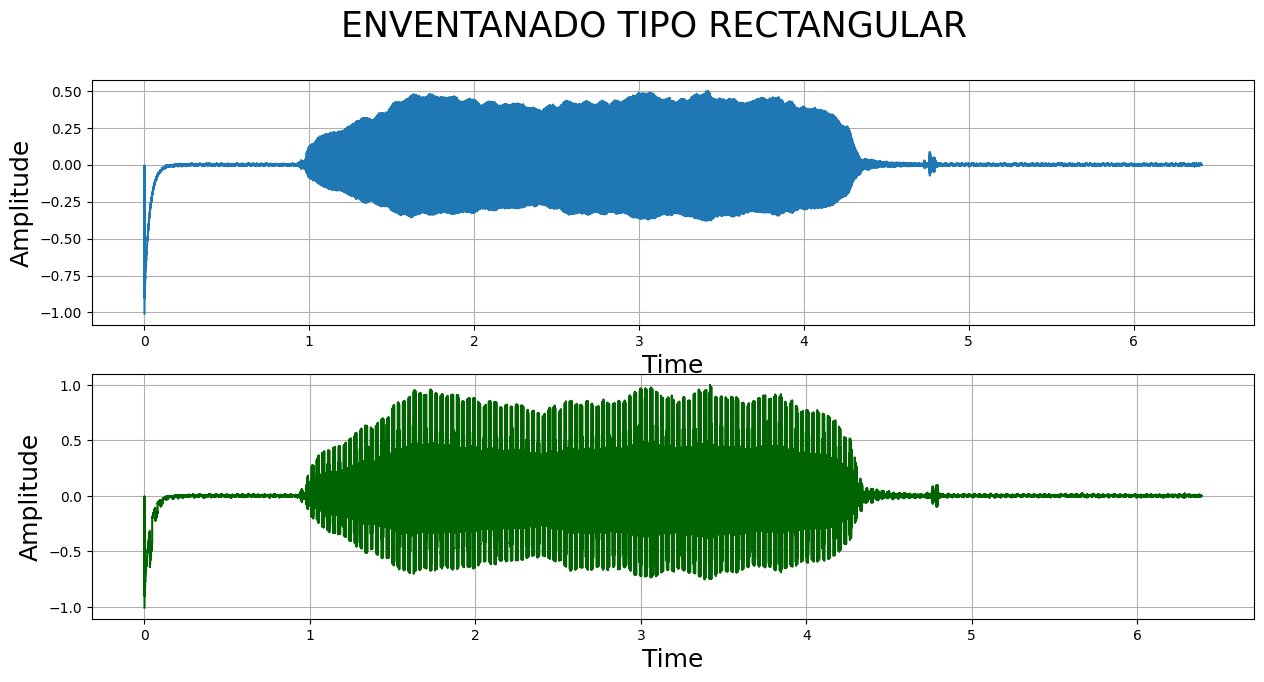

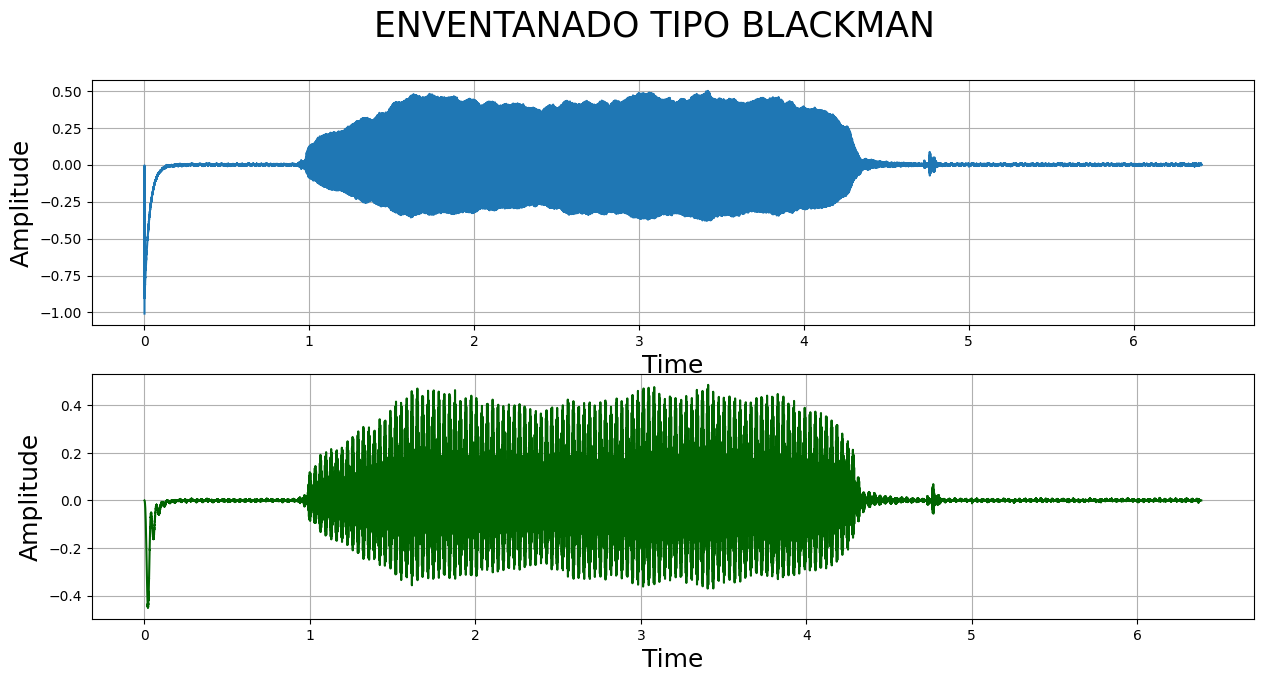

In [ ]:
def Eventanado(ventana, sennal, longitud, traslape, fs):

  N = sennal.size
  tam_paso = longitud-int(traslape*longitud)
  ventanas = int((N-longitud)/tam_paso) + 1
  sig_final=[]

  match ventana:
    case 1: # Hamming

      for i in range(ventanas):
        if i==0:
          muestra = sennal[0:longitud]*signal.hamming(longitud)  #PRIMER MUESTRA DE LA SEÑAL
          sig_final = muestra
        else:
          muestra = sennal[i*tam_paso:i*tam_paso+longitud]*signal.hamming(longitud)  #MUESTREADO CON SOLAPE
          ceros = [0 for j in range(tam_paso*i)]   #SE RELLENAN CON CEROS LOS VECTORES DE LAS MUESTRAS PARA DARLES EL MISMO TAMAÑO Y ASI PODER SUMARLOS
          muestra1 = np.concatenate((ceros,muestra))
          ceros2 = [0 for j in range(tam_paso)]
          sig_final2 = np.concatenate((sig_final,ceros2))
          sig_final = sig_final2 + muestra1   #SEÑAL RECONSTRUIDA
          t1 = np.arange(0,float(len(sig_final))/fs,1.0/fs)


      #GRAFICAS DE LA SEÑAL ORIGINAL Y LA SEÑAL RECONSTRUIDA

      plt.figure(figsize=(15,7))
      plt.suptitle('ENVENTANADO TIPO HAMMING', size = 25)
      plt.subplot(2,1,1)
      plt.plot(t,sennal)
      plt.xlabel('Time',fontsize=18)
      plt.ylabel('Amplitude',fontsize=18)
      plt.grid()

      plt.subplot(2,1,2)
      plt.plot(t1,sig_final,color='darkgreen')
      plt.xlabel('Time',fontsize=18)
      plt.ylabel('Amplitude',fontsize=18)
      plt.grid()
      plt.show()

      display(Audio(sig_final, rate=fs)) # para escuchar la senal, si se desea

      return sig_final


    case 2: # Hann

      for i in range(ventanas):
        if i==0:
          muestra = sennal[0:longitud]*signal.hann(longitud)  #PRIMER MUESTRA DE LA SEÑAL
          sig_final = muestra
        else:
          muestra = sennal[i*tam_paso:i*tam_paso+longitud]*signal.hann(longitud)  #MUESTREADO CON SOLAPE
          ceros = [0 for j in range(tam_paso*i)]   #SE RELLENAN CON CEROS LOS VECTORES DE LAS MUESTRAS PARA DARLES EL MISMO TAMAÑO Y ASI PODER SUMARLOS
          muestra1 = np.concatenate((ceros,muestra))
          ceros2 = [0 for j in range(tam_paso)]
          sig_final2 = np.concatenate((sig_final,ceros2))
          sig_final = sig_final2 + muestra1   #SEÑAL RECONSTRUIDA
          t1 = np.arange(0,float(len(sig_final))/fs,1.0/fs)


      #GRAFICAS DE LA SEÑAL ORIGINAL Y LA SEÑAL RECONSTRUIDA
      plt.figure(figsize=(15,7))
      plt.suptitle('ENVENTANADO TIPO HANN', size = 25)
      plt.subplot(2,1,1)
      plt.plot(t,sennal)
      plt.xlabel('Time',fontsize=18)
      plt.ylabel('Amplitude',fontsize=18)
      plt.grid()

      plt.subplot(2,1,2)
      plt.plot(t1,sig_final,color='darkgreen')
      plt.xlabel('Time',fontsize=18)
      plt.ylabel('Amplitude',fontsize=18)
      plt.grid()
      plt.show()

      display(Audio(sig_final, rate=fs)) # para escuchar la senal, si se desea
      return sig_final


    case 3: # Rectangular

      for i in range(ventanas):
        if i==0:
          muestra = sennal[0:longitud]*signal.boxcar(longitud)  #PRIMER MUESTRA DE LA SEÑAL
          sig_final = muestra
        else:
          muestra = sennal[i*tam_paso:i*tam_paso+longitud]*signal.boxcar(longitud)  #MUESTREADO CON SOLAPE
          ceros = [0 for j in range(tam_paso*i)]   #SE RELLENAN CON CEROS LOS VECTORES DE LAS MUESTRAS PARA DARLES EL MISMO TAMAÑO Y ASI PODER SUMARLOS
          muestra1 = np.concatenate((ceros,muestra))
          ceros2 = [0 for j in range(tam_paso)]
          sig_final2 = np.concatenate((sig_final,ceros2))
          sig_final = sig_final2 + muestra1   #SEÑAL RECONSTRUIDA
          t1 = np.arange(0,float(len(sig_final))/fs,1.0/fs)



      #GRAFICAS DE LA SEÑAL ORIGINAL Y LA SEÑAL RECONSTRUIDA
      plt.figure(figsize=(15,7))
      plt.suptitle('ENVENTANADO TIPO RECTANGULAR', size = 25)
      plt.subplot(2,1,1)
      plt.plot(t,sennal)
      plt.xlabel('Time',fontsize=18)
      plt.ylabel('Amplitude',fontsize=18)
      plt.grid()

      plt.subplot(2,1,2)
      plt.plot(t1,sig_final,color='darkgreen')
      plt.xlabel('Time',fontsize=18)
      plt.ylabel('Amplitude',fontsize=18)
      plt.grid()
      plt.show()

      display(Audio(sig_final, rate=fs)) # para escuchar la senal, si se desea
      return sig_final


    case 4: # Blackman

      for i in range(ventanas):
        if i==0:
          muestra = sennal[0:longitud]*signal.blackman(longitud)  #PRIMER MUESTRA DE LA SEÑAL
          sig_final = muestra
        else:
          muestra = sennal[i*tam_paso:i*tam_paso+longitud]*signal.blackman(longitud)  #MUESTREADO CON SOLAPE
          ceros = [0 for j in range(tam_paso*i)]   #SE RELLENAN CON CEROS LOS VECTORES DE LAS MUESTRAS PARA DARLES EL MISMO TAMAÑO Y ASI PODER SUMARLOS
          muestra1 = np.concatenate((ceros,muestra))
          ceros2 = [0 for j in range(tam_paso)]
          sig_final2 = np.concatenate((sig_final,ceros2))
          sig_final = sig_final2 + muestra1   #SEÑAL RECONSTRUIDA
          t1 = np.arange(0,float(len(sig_final))/fs,1.0/fs)


      #GRAFICAS DE LA SEÑAL ORIGINAL Y LA SEÑAL RECONSTRUIDA
      plt.figure(figsize=(15,7))
      plt.suptitle('ENVENTANADO TIPO BLACKMAN', size = 25)
      plt.subplot(2,1,1)
      plt.plot(t,sennal)
      plt.xlabel('Time',fontsize=18)
      plt.ylabel('Amplitude',fontsize=18)
      plt.grid()

      plt.subplot(2,1,2)
      plt.plot(t1,sig_final,color='darkgreen')
      plt.xlabel('Time',fontsize=18)
      plt.ylabel('Amplitude',fontsize=18)
      plt.grid()
      plt.show()

      display(Audio(sig_final, rate=fs)) # para escuchar la senal, si se desea
      return sig_final

señal1=Eventanado(1,x,1024,0.3,fs)
señal2=Eventanado(2,x,1024,0.3,fs)
señal3=Eventanado(3,x,1024,0.3,fs)
señal4=Eventanado(4,x,1024,0.3,fs)

<p style="text-align: justify;">Para mitigar el fenómeno de Gibbs se utilizan ventanas diferentes a la rectangular, caracterizadas por no tener cambios abruptos en el dominio del tiempo, lo que conduce a lóbulos menores en el dominio de la frecuencia.</p>

<p style="text-align: justify;">Tras observar el producto de aplicar el enventanado a la misma señal de audio, con los 4 tipos de ventana disponibles, se puede observar a simple vista que algunos tipos de ventana afectan de forma directa la amplitud de ciertas secciones de la señál. Siendo el cambio más significativo en la ventana rectangular.</p>

<p style="text-align: justify;">La ventana Rectangular, a nivel teórico, la más simple de todas, es a su vez la que más limitaciones pueda presentar y procesar la señal a un punto de obtener efectos secundarios no deseados a la hora de buscar obtener una fidelidad en la calidad de los datos.</p>

<p style="text-align: justify;">En el otro extremo encontramos el eventanado resultante de las ventanas tipo Hamming, que se caracteriza por ser el tipo de enventanado que menoor efecto secundario inyecta a las señal, a nivel de atenuación en frecuencia, reflejado en la señal en el dominio en el tiempo, observada.</p>

## 6. Autocorrelación y Reconstrucción de la Señal

<p style="text-align: justify;">Genere una función que reciba la señal enventanada (matriz) y entregue la reconstrucción de la señal inicial (vector). Para este propósito tenga en cuenta la suma, traslape y concatenación de cada segmento contenido en la matriz de entrada. Muestre un una gráfica la señal reconstruida junto con la original. Describa los resultados.</p>

<p style="text-align: justify;">Finalmente, evalúe la exactitud de la señal reconstruida, utilizando como métrica la auto-correlación.</p>

<p style="text-align: justify;">Grafique y compare la exactitud de reconstruccíon (métrica de autocorrelación) para las cuatro ventanas utilizadas (rectangular, Hann, y otras dos de su elección), ¿qué puede concluir de estos resultados?.</p>

(Text(0.5, 1.0, 'Analisis de Correlacion'),
 <matplotlib.legend.Legend at 0x7fa396d7ca30>)

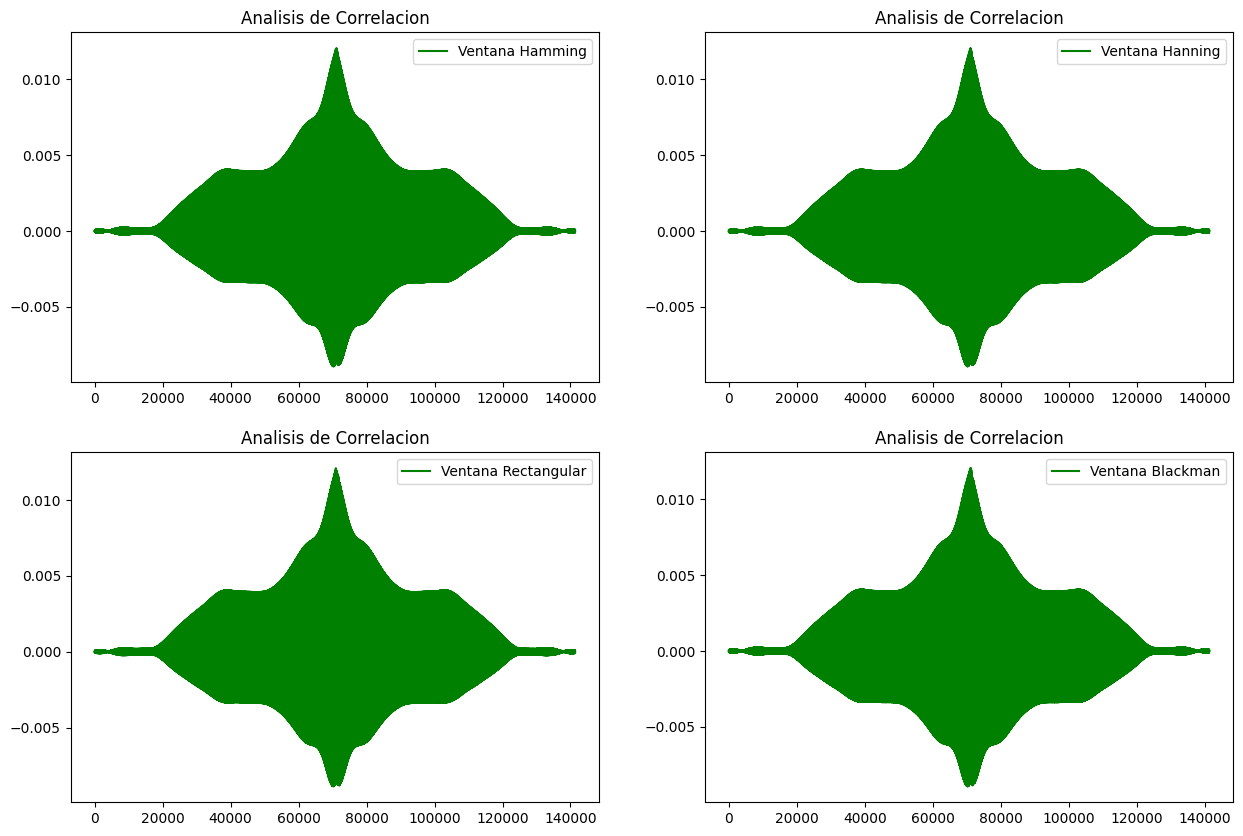

In [ ]:


corrSig_rect = np.correlate(señal1,x,mode='same')
corrSig_rect = corrSig_rect/np.linalg.norm(corrSig_rect)

corrSig_rect2 = np.correlate(señal2,x,mode='same')
corrSig_rect2 = corrSig_rect2/np.linalg.norm(corrSig_rect2)

corrSig_rect3 = np.correlate(señal3,x,mode='same')
corrSig_rect3 = corrSig_rect3/np.linalg.norm(corrSig_rect3)

corrSig_rect4 = np.correlate(señal4,x,mode='same')
corrSig_rect4 = corrSig_rect4/np.linalg.norm(corrSig_rect4)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(corrSig_rect, '-g', label = 'Ventana Hamming')
plt.title('Analisis de Correlacion'), plt.legend()

plt.subplot(2,2,2)
plt.plot(corrSig_rect2, '-g', label = 'Ventana Hanning')
plt.title('Analisis de Correlacion'), plt.legend()

plt.subplot(2,2,3)
plt.plot(corrSig_rect3, '-g', label = 'Ventana Rectangular')
plt.title('Analisis de Correlacion'), plt.legend()

plt.subplot(2,2,4)
plt.plot(corrSig_rect4, '-g', label = 'Ventana Blackman')
plt.title('Analisis de Correlacion'), plt.legend()


## 7. Conclusiones

- <p style="text-align: justify;">El proceso de ventaneo, cumple un papel fundamental en el proceso de transmisión de información, al analizar sus diferentes alternativas, se puede concluir utilidad a la hora de eliminar el fenomeno de gibbs causado por la incapacidad de la señal de estabilizarse inmediatamente, con este se logra una apreciación de la señal más natural y esperada.</p>

- <p style="text-align: justify;">La elección de una ventana u otra dependerá de las características físicas de los dispositivos disponibles para la generación de las señáles, así como la transmisión por el canal, siendo igualmente el canal un punto immportante a considerar. Se debe realizar un estudio de respuesta en la frecuencia de los tipos de ventana, para determinar el comportamiento de los lóbulos centrales y laterales y determinar la cantidad de información que sería filtrada al realizar el proceso, evaluando igualmente su posterior reconstrucción.</p>

- <p style="text-align: justify;">Cada tipo de ventana cuenta con sus características de funcionamiento que la hacen útil para cada tipo de escenario, del ejercicio propuesto es posible concluir que las ventanas Hann y Hamming presentan un comportamiento menos agresivo que la ventana Blackman donde se presenta atenuación de la señal en el dominio del tiempo más notoria.</p>

## Webgrafia

Window functions (scipy.signal.windows) https://docs.scipy.org/doc/scipy/reference/signal.windows.html

Curso Tratamiento de Señales 3 - Ude@ https://sites.google.com/view/signalpforml3/inicio

Guías de Laboratorio Curso Tratamiento de Señales 3
